# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading Dataset

In [2]:
df=pd.read_csv('Fraud.csv')

# Analyzing Data

In [3]:
df.head(1000)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,PAYMENT,2167.26,C732597634,13669.0,11501.74,M832432849,0.0,0.0,0,0
996,1,PAYMENT,9738.95,C2031927175,289748.0,280009.05,M176041373,0.0,0.0,0,0
997,1,PAYMENT,3396.25,C1967617997,18524.0,15127.75,M726843606,0.0,0.0,0,0
998,1,PAYMENT,6780.78,C925803196,52640.0,45859.22,M1288135425,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<Axes: >

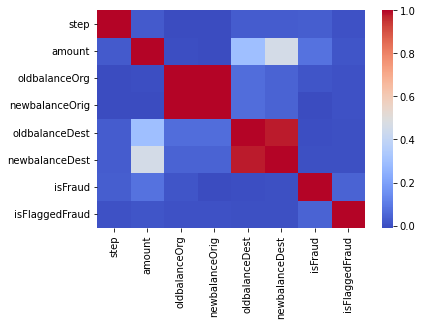

In [7]:
#displaying the heat-map of correlation among each columns
sns.heatmap(df.corr(),cmap='coolwarm')

<Axes: >

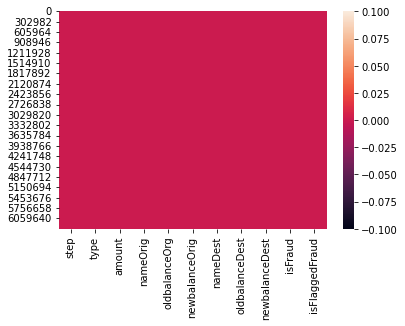

In [8]:
#checking whether there is any null value or not and displaying the respective heatmap
sns.heatmap(df.isnull())

In [9]:
df.isnull().values.any()

False

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
dfFraudCount=df.loc[(df.isFraud==1)]
len(dfFraudCount)

8213

In [12]:
dfNonFraudCount=df.loc[(df.isFraud==0)]
len(dfNonFraudCount)

6354407

In [13]:
#calculating number of fraud transfers
dfFraudTransfer=df.loc[(df.isFraud==1) & (df.type=='TRANSFER')]
len(dfFraudTransfer)

4097

In [14]:
#calculating number of frauds in cash_out
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')] 
len(dfFraudCashout)

4116

In [15]:
#calculating number of transfers which are greater than 2,00,000
dFraundcount=df.loc[(df.isFlaggedFraud==1)]
len(dFraundcount)

16

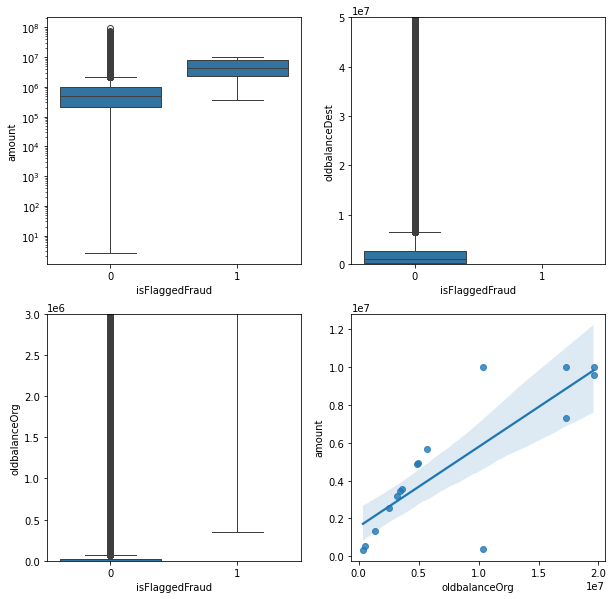

In [16]:

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
tmp = df.loc[(df.type == 'TRANSFER'), :]

a = sns.boxplot(x = 'isFlaggedFraud', y='amount', data = tmp, ax=axs[0][0])
axs[0][0].set_yscale('log')
b = sns.boxplot(x = 'isFlaggedFraud', y='oldbalanceDest', data = tmp, ax=axs[0][1])
axs[0][1].set(ylim=(0,0.5e8))
c = sns.boxplot(x = 'isFlaggedFraud', y='oldbalanceOrg', data = tmp, ax=axs[1][0])
axs[1][0].set(ylim=(0,0.3e7))
d = sns.regplot(x = 'oldbalanceOrg', y='amount', data = tmp.loc[(tmp.isFlaggedFraud == 1), :], ax=axs[1][1])
plt.show()

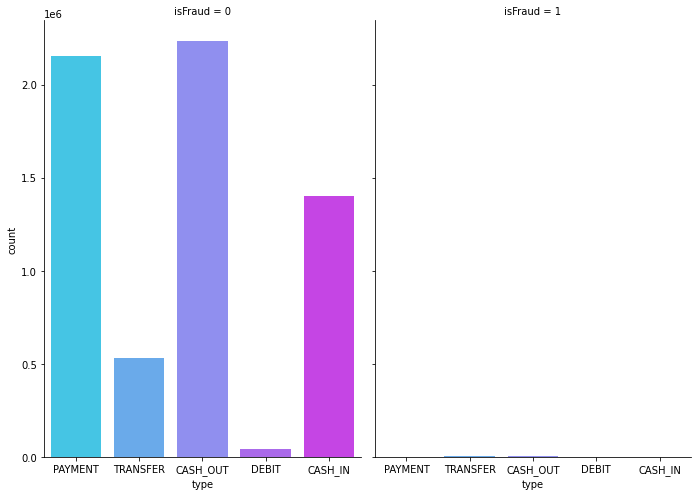

In [17]:

sns.catplot(x="type",col='isFraud',data = df,kind= 'count',height=7,aspect=.7,palette='cool')

# Data Cleaning

In [18]:
#We have analysed that fraud transaction exists only for 'TRANSFER' and 'CASH_OUT'
#Creating a new dataset containing only transfer and cash-outs
X= df.loc[(df['type'] == 'TRANSFER') | (df['type']== 'CASH_OUT') ]

In [19]:
#displaying the first 5 data of x
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [20]:
#Eliminate columns shown to be irrelevant for analysis in the EDA
X.drop(['nameOrig','nameDest','isFlaggedFraud','step'],axis =1,inplace=True)

In [21]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,TRANSFER,181.00,181.0,0.0,0.0,0.00,1
3,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1
15,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0
19,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0
24,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [22]:
X.columns


Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [23]:
#converting the categorical values into binary values for the column 'type'
X['type'] = X['type'].astype('category')
X['TRANSFER'] = X['type'].cat.codes


In [24]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,TRANSFER
2,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,1
3,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0
15,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,0
19,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,1
24,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,1


In [25]:
X.drop(['type'],axis=1,inplace=True)

In [26]:
X.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,TRANSFER
2,181.00,181.0,0.0,0.0,0.00,1,1
3,181.00,181.0,0.0,21182.0,0.00,1,0
15,229133.94,15325.0,0.0,5083.0,51513.44,0,0
19,215310.30,705.0,0.0,22425.0,0.00,0,1
24,311685.89,10835.0,0.0,6267.0,2719172.89,0,1


In [27]:
# Change the name of DataFrame from X to NewData
NewData=X

In [28]:
X.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,TRANSFER
2,181.00,181.0,0.0,0.0,0.00,1,1
3,181.00,181.0,0.0,21182.0,0.00,1,0
15,229133.94,15325.0,0.0,5083.0,51513.44,0,0
19,215310.30,705.0,0.0,22425.0,0.00,0,1
24,311685.89,10835.0,0.0,6267.0,2719172.89,0,1


In [29]:
# Checking for the outliers

In [30]:
# Identify Outliers for Each Column using IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 1.5

# Determine outliers for each column
outliers = {}

for column in X.columns:
    is_outlier = (X[column] < (Q1[column] - threshold * IQR[column])) | (X[column] > (Q3[column] + threshold * IQR[column]))
    outliers[column] = X[is_outlier]

# Display columns with outliers
for column, data in outliers.items():
    if not data.empty:
        print(f"Outliers found in column '{column}':")
        print(data)


Outliers found in column 'amount':
             amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
85       1505626.01           0.00             0.0        29031.00   
88        761507.39           0.00             0.0      1280036.23   
89       1429051.47           0.00             0.0      2041543.62   
94       1724887.05           0.00             0.0      3470595.10   
95        710544.77           0.00             0.0       738531.50   
...             ...            ...             ...             ...   
6362613  1258818.82     1258818.82             0.0       503464.50   
6362616  6311409.28     6311409.28             0.0            0.00   
6362617  6311409.28     6311409.28             0.0        68488.84   
6362618   850002.52      850002.52             0.0            0.00   
6362619   850002.52      850002.52             0.0      6510099.11   

         newbalanceDest  isFraud  TRANSFER  
85           5515763.34        0         1  
88          19169204.93        0  

<Axes: >

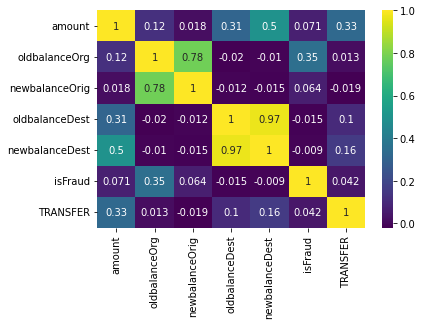

In [31]:
#displaying the heat map of correlation
sns.heatmap(NewData.corr(),annot=True,cmap='viridis')

In [32]:
X=NewData
X.head()
target_col=NewData['isFraud']
target_col.head()

2     1
3     1
15    0
19    0
24    0
Name: isFraud, dtype: int64

# Handling  multi-collinearity

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
features = ['amount', 'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest', 'TRANSFER']

# Calculate VIF
X = X[features]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

          feature        VIF
0          amount   5.310157
1   oldbalanceOrg   2.752973
2  newbalanceOrig   2.627680
3  oldbalanceDest  65.138998
4  newbalanceDest  80.725410
5        TRANSFER   1.233617


In [35]:
# Drop 'newbalanceDest' due to high VIF scores
Newdf=X.drop(columns=['newbalanceDest'])

In [36]:
Newdf.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,TRANSFER
2,181.00,181.0,0.0,0.0,1
3,181.00,181.0,0.0,21182.0,0
15,229133.94,15325.0,0.0,5083.0,0
19,215310.30,705.0,0.0,22425.0,1
24,311685.89,10835.0,0.0,6267.0,1


In [37]:
# Checking VIF Score after droping newbalanceDest column
features = ['amount', 'oldbalanceOrg','newbalanceOrig','oldbalanceDest', 'TRANSFER']

# Calculate VIF
X = Newdf[features]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

          feature       VIF
0          amount  1.419577
1   oldbalanceOrg  2.688387
2  newbalanceOrig  2.612006
3  oldbalanceDest  1.197416
4        TRANSFER  1.231220


In [38]:
# Now its good 
final_df = pd.concat([Newdf[features], target_col], axis=1)
NewData=final_df
NewData.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,TRANSFER,isFraud
2,181.00,181.0,0.0,0.0,1,1
3,181.00,181.0,0.0,21182.0,0,1
15,229133.94,15325.0,0.0,5083.0,0,0
19,215310.30,705.0,0.0,22425.0,1,0
24,311685.89,10835.0,0.0,6267.0,1,0


# Under sampling

<Axes: xlabel='isFraud', ylabel='count'>

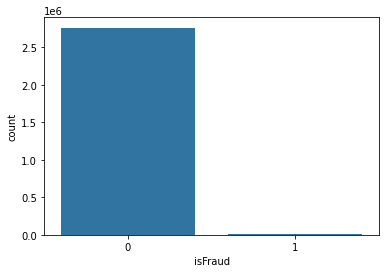

In [39]:
# displaying the countplot
sns.countplot(x='isFraud' ,data=NewData)

In [40]:
frauds =len(NewData[NewData['isFraud'] == 1])
frauds

8213

In [41]:
notfrauds =len(NewData[NewData['isFraud'] == 0])
notfrauds

2762196

In [42]:

#from the countplot we observe that dataset is imbalanced
#Hence we move on to balance the data
#Calculating the number of fraud transactions in our new calculated dataset
frauds =len(NewData[NewData['isFraud'] == 1])
#Storing the corresponding to the fraud transaction indices
fraud_indices = NewData[NewData.isFraud == 1].index
#Storing the corresponding to the non fraud transaction indices
non_fraud_indices = NewData[NewData.isFraud == 0].index

In [43]:

#calculating the number of non fraud transcations
non_frauds = len(NewData[NewData['isFraud'] == 0])
#we randomly choose from non-fraud-indices , such that its number equals with no. of fraud ones
np.random.seed(0)
random_indices = np.random.choice(non_fraud_indices,frauds, replace=False)
len(random_indices)

8213

In [44]:

#random indices and fraud indices are concanated and we obtain the indices we require for our new balanced dataset
under_sample_indices = np.concatenate([random_indices,fraud_indices],axis=0)
len(under_sample_indices)

16426

In [45]:

#Obtaining the new final balanced data-set using the indices obtained in the previous dataset
under_sample = NewData.loc[under_sample_indices]
under_sample.reset_index(inplace=True,drop=True)
under_sample.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,TRANSFER,isFraud
0,200978.67,6592.0,0.0,0.00,0,0
1,133246.97,0.0,0.0,288141.15,0,0
2,2875864.54,15011.0,0.0,0.00,1,0
3,293331.60,0.0,0.0,491315.07,0,0
4,201668.50,0.0,0.0,2025944.19,0,0


In [46]:
#calculating the number of non fraud transactions in under sampled dataset
under_sample[under_sample['isFraud']==0].count()

amount            8213
oldbalanceOrg     8213
newbalanceOrig    8213
oldbalanceDest    8213
TRANSFER          8213
isFraud           8213
dtype: int64

<Axes: xlabel='isFraud', ylabel='count'>

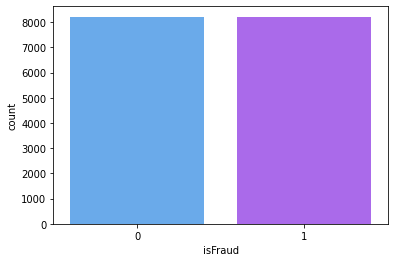

In [47]:
#displaying the counplot
sns.countplot(x='isFraud',data=under_sample,palette='cool')

<Axes: >

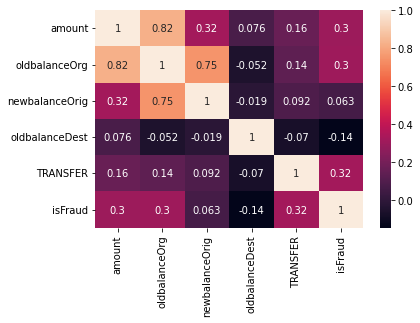

In [48]:
#displaying the heatmap of correlation
sns.heatmap(under_sample.corr(),annot=True)

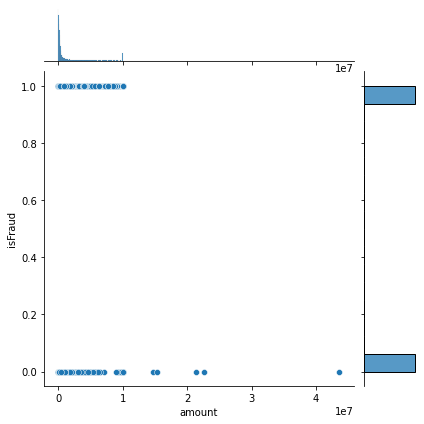

In [49]:
#Joint-plot of'amount' vs. 'isFraud'
sns.jointplot(x='amount',y='isFraud',data=under_sample)

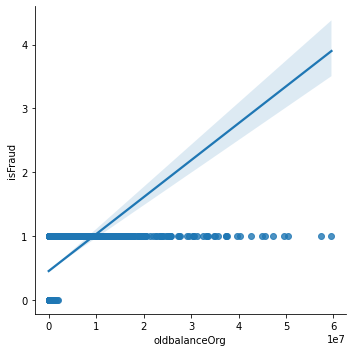

In [50]:
sns.lmplot(x='oldbalanceOrg',y='isFraud',data=under_sample)

# Training Model

In [51]:
#choosing our dependent and independent variables,respectively
y = under_sample['isFraud']
x = under_sample[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','TRANSFER']]

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
#Choosing training data to be 30% and rest as our testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
#creating object for Logistic regression
lr_under = LogisticRegression()

In [56]:
#providing datas to train the machine
lr_under.fit(x_train,y_train)

LogisticRegression()

In [57]:
#storing the predicted values
y_under_pred = lr_under.predict(x_test)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
#printing the classification report
print(classification_report(y_test,y_under_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2484
           1       0.93      0.83      0.88      2444

    accuracy                           0.89      4928
   macro avg       0.89      0.88      0.88      4928
weighted avg       0.89      0.89      0.88      4928



In [60]:
#we find model accuracy to be 89%. Hence we can accept the model

In [61]:
#printing the confusion matrix
print(confusion_matrix(y_test,y_under_pred))

[[2338  146]
 [ 420 2024]]


In [62]:
#Cross-validation of our model
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=lr_under,X=x_train,y=y_train)
accuracies.mean()

0.8837185922045501

In [63]:
from sklearn.metrics import roc_curve

In [64]:
fpr, tpr,_=roc_curve(y_under_pred,y_test,drop_intermediate=False)
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

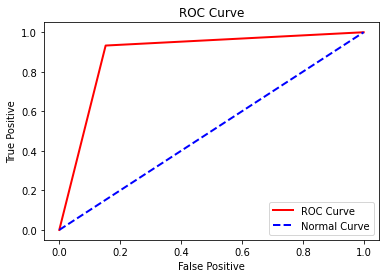

In [65]:
#plotting the ROC curve
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--',label= 'Normal Curve')
##Title and label
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [66]:
#Finding the area under ROC curve
from sklearn import metrics
metrics.auc(fpr, tpr)

0.8902173150249129

# KNN Algorithm

In [67]:
from sklearn.preprocessing import StandardScaler 

In [68]:

#creating standardscalar
scalar = StandardScaler()


In [69]:
#scaling the dataset o make the mean 0 and standard deviation 1 
scalar.fit(x)

StandardScaler()

In [70]:
scaled_features = scalar.transform(x)

In [71]:
#creating a new dataset after transforming the old data set 
df_feat = pd.DataFrame(scaled_features,columns = x.columns) 

In [72]:
df_feat.head()


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,TRANSFER
0,-0.363990,-0.318615,-0.074574,-0.276949,-0.730062
1,-0.399606,-0.321117,-0.074574,-0.206708,-0.730062
2,1.042561,-0.315421,-0.074574,-0.276949,1.369746
3,-0.315427,-0.321117,-0.074574,-0.157180,-0.730062
4,-0.363627,-0.321117,-0.074574,0.216919,-0.730062


In [73]:

# Defining of dependent and independent variables,respectively
x1=df_feat[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'TRANSFER']] 
y1=under_sample['isFraud']

In [74]:
#30% of the data is used for testing and remaining 705 is used for training
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=101)

In [75]:
from sklearn.neighbors import KNeighborsClassifier 

In [76]:
#creating object with 1 neighbour hence predicting the results
Knn=KNeighborsClassifier(n_neighbors=1) 
Knn.fit(x1_train,y1_train)
pred=Knn.predict(x1_test) 
pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [77]:

#printing the confuusion matrix 
print(confusion_matrix(y1_test,pred))

[[2396   88]
 [  76 2368]]


In [78]:
#printing the classification report 
print(classification_report(y1_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2484
           1       0.96      0.97      0.97      2444

    accuracy                           0.97      4928
   macro avg       0.97      0.97      0.97      4928
weighted avg       0.97      0.97      0.97      4928



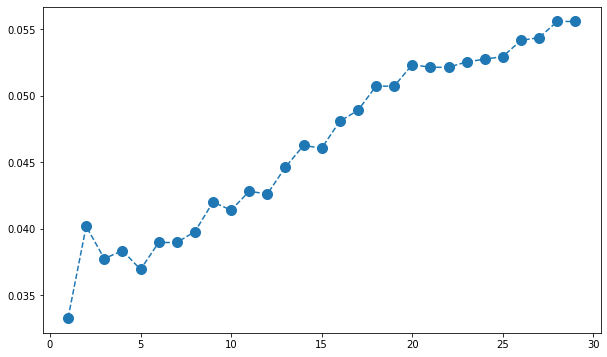

In [79]:
#we find that our knn model is 97% accurate. Hence it can be accepted.
 
#calculating the error rate for different values of 'n-neighbours' 
error_rate=[]
for i in range(1,30): 
    Knn=KNeighborsClassifier(n_neighbors=i) 
    Knn.fit(x1_train,y1_train) 
    pred_i=Knn.predict(x1_test) 
    error_rate.append(np.mean(pred_i!=y1_test))
plt.figure(figsize=(10,6)) 
plt.plot(range(1,30),error_rate,linestyle='dashed',marker='o',markersize=10)

In [80]:

# the graph shows that knn has least error when number of neighbours selected is 1 which we have already selected 
#Performing cross-validation on our selected model
from sklearn.model_selection import cross_val_score 
accuracies=cross_val_score(estimator=Knn,X=x1_train,y=y1_train) 
accuracies.mean()

0.9372061955103353

In [81]:
fpr1, tpr1,_=roc_curve(pred,y1_test,drop_intermediate=False) 
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

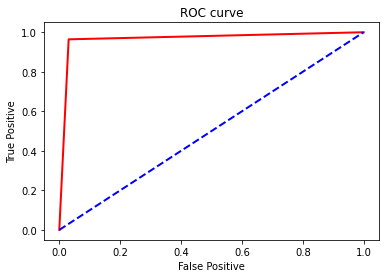

In [82]:
#plotting the ROC curve 
plt.plot(fpr1, tpr1, color='red', lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--') 
##Title and label
plt.xlabel('False Positive') 
plt.ylabel('True Positive') 
plt.title('ROC curve') 
plt.show()

In [83]:
#Finding area under ROC curve 
metrics.auc(fpr1,tpr1)

0.9667125222689562

# Support Vector Machine

In [84]:
from sklearn.svm import SVC 
#Creating SVM object
model = SVC()


In [85]:

#Training of model 
model.fit(x_train,y_train)


SVC()

In [86]:
#Prediction using SVM
pred = model.predict(x_test)

In [87]:

#Confusion matrix display 
print(confusion_matrix(y_test,pred))

[[2376  108]
 [ 578 1866]]


In [88]:
#Classification report of our SVM model 
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      2484
           1       0.95      0.76      0.84      2444

    accuracy                           0.86      4928
   macro avg       0.87      0.86      0.86      4928
weighted avg       0.87      0.86      0.86      4928



In [89]:
#Cross-validation of our SVM model
from sklearn.model_selection import cross_val_score 
accuracies=cross_val_score(estimator=model,X=x_train,y=y_train) 
accuracies.mean()

0.8483210091344062

In [90]:
#We find that SVM has very low accuracy hence we discard this model.

# Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
#creating object and providing training data 
dtree=DecisionTreeClassifier() 
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [92]:

#Predicting frim our model 
pre=dtree.predict(x_test)

In [93]:

#displaying the classification report and confusion matrix 
print(confusion_matrix(y_test,pre)) 
print(classification_report(y_test,pre))

[[2461   23]
 [  28 2416]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2484
           1       0.99      0.99      0.99      2444

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



In [94]:

#We find that our accuracy is quite high, to be 99%. we further cross-validate our model. 
#Cross-validation of our model
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=dtree,X=x_train,y=y_train,cv=10) 
accuracies.mean()

0.9857361789079351

In [95]:

fpr1, tpr1,_=roc_curve(pre,y_test,drop_intermediate=False) 
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

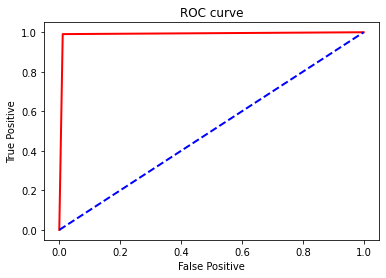

In [96]:
#plotting the ROC curve 
plt.plot(fpr1, tpr1, color='red', lw=2, label='ROC curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--') 
##Title and label
plt.xlabel('False Positive') 
plt.ylabel('True Positive') 
plt.title('ROC curve') 
plt.show()

In [97]:
#Finding area under ROC curve 
metrics.auc(fpr1,tpr1)

0.9896602039543899

# Random Forest Classifier

In [98]:

from sklearn.ensemble import RandomForestClassifier
#creating an object for random forest having 1000 as parameter for n_estimators 
rfc=RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [99]:
#prediction using this model 
rfc_pred=rfc.predict(x_test)
#displaying the confusion matrix and classification report 
print(confusion_matrix(y_test,rfc_pred)) 
print(classification_report(y_test,rfc_pred))

[[2450   34]
 [  10 2434]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2484
           1       0.99      1.00      0.99      2444

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



In [100]:
#we find that our model has 99% accuracy 
#cross-validation of our model
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=rfc,X=x_train,y=y_train,cv=10) 
accuracies.mean()

0.9888671434517727

In [101]:
fpr1, tpr1,_=roc_curve(rfc_pred,y_test,drop_intermediate=False) 
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

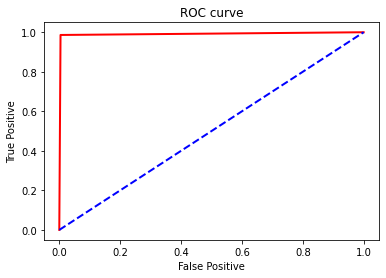

In [102]:

#plotting the ROC curve 
plt.plot(fpr1, tpr1, color='red', lw=2, label='ROC curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--') 
##Title and label
plt.xlabel('False Positive') 
plt.ylabel('True Positive') 
plt.title('ROC curve') 
plt.show()

In [103]:
#Finding area under ROC curve 
metrics.auc(fpr1,tpr1)

0.9910793111172603

# We finally find that the 'Decision Tree' or the 'Random Forest Classifier' model has the best accuracy. Hence we choose it.